# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [16]:
df = pd.read_csv('SINASC_RO_2019.csv')
df1 = pd.read_csv('dados_extras_ro.csv', sep=';', encoding='latin_1')
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [17]:
regioes_map = dict(zip(df1['municipio'], df1['regiao']))
regioes_map

{"Alta Floresta D'Oeste": 'Cacoal',
 'Alto Alegre dos Parecis': 'Cacoal',
 'Alto Paraíso': 'Ariquemes',
 "Alvorada D'Oeste": 'Ji-Paraná',
 'Ariquemes': 'Ariquemes',
 'Buritis': 'Ariquemes',
 'Cabixi': 'Vilhena',
 'Cacaulândia': 'Ariquemes',
 'Cacoal': 'Cacoal',
 'Campo Novo de Rondônia': 'Ariquemes',
 'Candeias do Jamari': 'Porto Velho',
 'Castanheiras': 'Cacoal',
 'Cerejeiras': 'Vilhena',
 'Chupinguaia': 'Vilhena',
 'Colorado do Oeste': 'Vilhena',
 'Corumbiara': 'Vilhena',
 'Costa Marques': 'Ji-Paraná',
 'Cujubim': 'Ariquemes',
 "Espigão D'Oeste": 'Cacoal',
 'Governador Jorge Teixeira': 'Jaru',
 'Guajará-Mirim': 'Porto Velho',
 'Itapuã do Oeste': 'Porto Velho',
 'Jaru': 'Jaru',
 'Ji-Paraná': 'Ji-Paraná',
 "Machadinho D'Oeste": 'Jaru',
 'Ministro Andreazza': 'Cacoal',
 'Mirante da Serra': 'Ji-Paraná',
 'Monte Negro': 'Ariquemes',
 "Nova Brasilândia D'Oeste": 'Cacoal',
 'Nova Mamoré': 'Porto Velho',
 'Nova União': 'Ji-Paraná',
 'Novo Horizonte do Oeste': 'Cacoal',
 'Ouro Preto do Oeste'

In [18]:
df1.head()

,municipio,regiao,idh,ifdm,pib
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098
4,Ariquemes,Ariquemes,0.702,0.7746,2579830


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [20]:
# Criar faixas de latitude
df['Latitude_Faixa'] = df['munResLat'].apply(lambda x: 'Acima de -10.5' if x > -10.5 else 'Abaixo de -10.5')

# Selecionar variáveis numéricas para a análise
variaveis_numericas = ['PESO', 'APGAR1']

# Agrupar pelos faixas de latitude e calcular as estatísticas
estatisticas = df.groupby('Latitude_Faixa')[variaveis_numericas].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

# Exibir os resultados
print(estatisticas)

                     PESO                                              \
                      sum         mean  min   max  median         std   
Latitude_Faixa                                                          
Abaixo de -10.5  42101809  3240.096121  258  5985  3270.0  531.794694   
Acima de -10.5   45555148  3246.055864  295  5190  3275.0  556.487709   

                                  APGAR1                              \
                           var       sum      mean  min   max median   
Latitude_Faixa                                                         
Abaixo de -10.5  282805.596163  104599.0  8.070288  0.0  10.0    8.0   
Acima de -10.5   309678.570242  114559.0  8.199771  0.0  10.0    8.0   

                                     
                      std       var  
Latitude_Faixa                       
Abaixo de -10.5  0.960765  0.923069  
Acima de -10.5   1.002839  1.005686  


In [21]:
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,Latitude_Faixa
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Abaixo de -10.5
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [22]:
# Criar faixas de área dos municípios
df['Area_Faixa'] = df['munResArea'].apply(lambda x: 'Acima de 3000' if x > 3000 else 'Abaixo de 3000')

# Selecionar variáveis numéricas para a análise
variaveis_numericas = ['CONSULTAS', 'PARIDADE']

# Agrupar pelas faixas de área e calcular as estatísticas
estatisticas = df.groupby('Area_Faixa')[variaveis_numericas].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

# Exibir os resultados
print(estatisticas)

               CONSULTAS                                               \
                     sum      mean min max median       std       var   
Area_Faixa                                                              
Abaixo de 3000     19521  3.739655   1   9    4.0  0.608617  0.370414   
Acima de 3000      77142  3.537326   1   9    4.0  0.820967  0.673986   

               PARIDADE                                               
                    sum      mean min max median       std       var  
Area_Faixa                                                            
Abaixo de 3000     3363  0.644253   0   1    1.0  0.478785  0.229235  
Acima de 3000     14172  0.649853   0   1    1.0  0.477027  0.227554  


In [23]:
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,Latitude_Faixa,Area_Faixa
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Abaixo de -10.5,Acima de 3000
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [24]:
# Criar faixas de altitude usando bins
bins = [-float('inf'), 500, 1000, 1500, float('inf')]
labels = ['Baixa', 'Média-Baixa', 'Média-Alta', 'Alta']
df['Altitude_Faixa'] = pd.cut(df['munResAlt'], bins=bins, labels=labels)

# Selecionar variáveis numéricas para a análise
variaveis_numericas = ['QTDPARTCES', 'QTDPARTNOR']

# Agrupar pelas faixas de altitude e calcular as estatísticas
estatisticas = df.groupby('Altitude_Faixa')[variaveis_numericas].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

# Exibir os resultados
print(estatisticas)

               QTDPARTCES                                                  \
                      sum      mean  min   max median       std       var   
Altitude_Faixa                                                              
Baixa             12198.0  0.515750  0.0  12.0    0.0  0.745583  0.555894   
Média-Baixa         938.0  0.591798  0.0   4.0    0.0  0.754152  0.568746   
Média-Alta            0.0       NaN  NaN   NaN    NaN       NaN       NaN   
Alta                  0.0       NaN  NaN   NaN    NaN       NaN       NaN   

               QTDPARTNOR                                                  
                      sum      mean  min   max median       std       var  
Altitude_Faixa                                                             
Baixa             14049.0  0.596231  0.0  41.0    0.0  1.228163  1.508384  
Média-Baixa         522.0  0.329338  0.0   9.0    0.0  0.840907  0.707125  
Média-Alta            0.0       NaN  NaN   NaN    NaN       NaN       NaN  
Alta

C:\Users\Joel\AppData\Local\Temp\ipykernel_11928\2381880438.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  estatisticas = df.groupby('Altitude_Faixa')[variaveis_numericas].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])


### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [25]:
#Filtre os dados para incluir apenas mulheres:
df_mulheres = df[df['SEXO'] == 'Feminino']
df_mulheres

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,Latitude_Faixa,Area_Faixa,Altitude_Faixa
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,Baixa
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,Baixa
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Abaixo de -10.5,Acima de 3000,Baixa
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,Baixa
6,1,2516500.0,110001,1,37,1.0,8 a 11 anos,999992.0,1.0,0.0,...,MUNIC,Novo Horizonte do Oeste,Rondônia,-11.70974,-61.99439,230.0,843.446,Abaixo de -10.5,Abaixo de 3000,Baixa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27012,1,2674955.0,510340,1,36,2.0,12 anos ou mais,142210.0,1.0,0.0,...,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,Abaixo de -10.5,Acima de 3000,Média-Baixa
27013,1,2494523.0,510340,1,31,1.0,12 anos ou mais,999992.0,0.0,0.0,...,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,Abaixo de -10.5,Acima de 3000,Média-Baixa
27016,1,2604388.0,510340,1,29,2.0,12 anos ou mais,354705.0,1.0,0.0,...,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,Abaixo de -10.5,Acima de 3000,Média-Baixa
27018,1,2494523.0,510340,1,36,2.0,12 anos ou mais,223505.0,1.0,1.0,...,MUNIC,Cacoal,Rondônia,-11.43387,-61.44294,177.0,3792.998,Abaixo de -10.5,Acima de 3000,Baixa


In [26]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [27]:
#Adicione uma coluna de região imediatamente ao DataFrame:
df_mulheres['regiao_imediata'] = df_mulheres['munResNome'].map(imediatas)
df_mulheres

C:\Users\Joel\AppData\Local\Temp\ipykernel_11928\1718893419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mulheres['regiao_imediata'] = df_mulheres['munResNome'].map(imediatas)


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,Latitude_Faixa,Area_Faixa,Altitude_Faixa,regiao_imediata
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,Baixa,Cacoal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,Baixa,Cacoal
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Abaixo de -10.5,Acima de 3000,Baixa,Cacoal
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,Baixa,Cacoal
6,1,2516500.0,110001,1,37,1.0,8 a 11 anos,999992.0,1.0,0.0,...,Novo Horizonte do Oeste,Rondônia,-11.70974,-61.99439,230.0,843.446,Abaixo de -10.5,Abaixo de 3000,Baixa,Cacoal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27012,1,2674955.0,510340,1,36,2.0,12 anos ou mais,142210.0,1.0,0.0,...,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,Abaixo de -10.5,Acima de 3000,Média-Baixa,Vilhena
27013,1,2494523.0,510340,1,31,1.0,12 anos ou mais,999992.0,0.0,0.0,...,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,Abaixo de -10.5,Acima de 3000,Média-Baixa,Vilhena
27016,1,2604388.0,510340,1,29,2.0,12 anos ou mais,354705.0,1.0,0.0,...,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,Abaixo de -10.5,Acima de 3000,Média-Baixa,Vilhena
27018,1,2494523.0,510340,1,36,2.0,12 anos ou mais,223505.0,1.0,1.0,...,Cacoal,Rondônia,-11.43387,-61.44294,177.0,3792.998,Abaixo de -10.5,Acima de 3000,Baixa,Cacoal


In [28]:
#Calcule a idade média das mulheres por ano e por região imediata:
media_idade = df_mulheres.groupby(['regiao_imediata'])['IDADEMAE'].mean().reset_index()
media_idade

,regiao_imediata,IDADEMAE
0,Ariquemes,25.460274
1,Cacoal,26.509178
2,Jaru,25.866242
3,Ji-Paraná,26.242088
4,Porto Velho,26.168842
5,Vilhena,26.377311


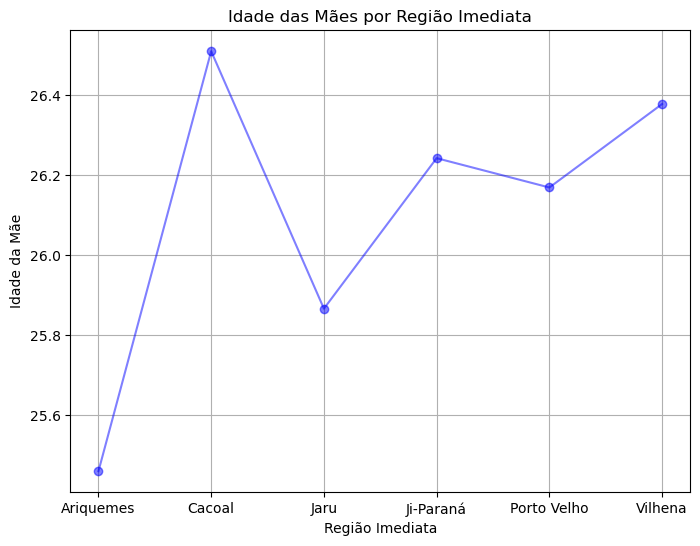

In [29]:
plt.figure(figsize=(8, 6))
plt.plot(media_idade['regiao_imediata'], media_idade['IDADEMAE'], color='blue', alpha=0.5, marker='o')
plt.title('Idade das Mães por Região Imediata')
plt.xlabel('Região Imediata')
plt.ylabel('Idade da Mãe')
plt.grid(True)
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


In [30]:
df1.head(10)

,municipio,regiao,idh,ifdm,pib
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098
4,Ariquemes,Ariquemes,0.702,0.7746,2579830
5,Buritis,Ariquemes,0.616,0.6199,726000
6,Cabixi,Vilhena,0.650,0.5887,113031
7,Cacaulândia,Ariquemes,0.646,0.5721,116635
8,Cacoal,Cacoal,0.718,0.7111,2261644
9,Campo Novo de Rondônia,Ariquemes,0.593,0.5272,208821


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [31]:
idh_bins = [0.5, 0.6, 0.7, 0.8]
idh_labels = ['Baixo', 'Médio', 'Alto']
df1['faixa_idh'] = pd.cut(df1['idh'], bins=idh_bins, labels=idh_labels, right=False)
df1

,municipio,regiao,idh,ifdm,pib,faixa_idh
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000,Médio
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410,Baixo
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000,Médio
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098,Médio
4,Ariquemes,Ariquemes,0.702,0.7746,2579830,Alto
5,Buritis,Ariquemes,0.616,0.6199,726000,Médio
6,Cabixi,Vilhena,0.650,0.5887,113031,Médio
7,Cacaulândia,Ariquemes,0.646,0.5721,116635,Médio
8,Cacoal,Cacoal,0.718,0.7111,2261644,Alto
9,Campo Novo de Rondônia,Ariquemes,0.593,0.5272,208821,Baixo


In [32]:
url_idh = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M"
idh_ro = pd.read_html(url_idh) 

#Acessando informação da idh
idh_df = idh_ro[0]

#Dropando os indeces indesejados
idh_df.columns = idh_df.columns.droplevel(2)
idh_df.columns = idh_df.columns.droplevel(0)

#Removendo a primeira coluna
idh_df = idh_df.iloc[:, 1:]

#Removendo a primeira linha
idh_df = idh_df.iloc[1:, :]

#Removendo as duas ultimas linhas
idh_df = idh_df.iloc[:-2, :]

#Setando a primeira coluna com indice do dataframe
idh_df.set_index(idh_df.columns[0], inplace=True)

#Selecionando apenas o idh dos municipios
idh_df = idh_df.iloc[:, 0:1]

#Deletando os indeces dos referentes idhs
idh_df.drop(index=['IDH-M alto', 'IDH-M médio', 'IDH-M baixo'], inplace=True)
idh_df

,IDH municipal
Município,
Porto Velho,0.736
Vilhena,0.731
Cacoal,0.718
Ji-Paraná,0.714
Pimenta Bueno,0.710
Ariquemes,0.702
Rolim de Moura,0.700
Cerejeiras,0.692
Jaru,0.689


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [33]:
ifdm_bins = [0.5, 0.6, 0.7, 0.8]
ifdm_labels = ['Baixo', 'Médio', 'Alto']
df1['faixa_ifdm'] = pd.cut(df1['ifdm'], bins=ifdm_bins, labels=ifdm_labels, right=False)
df1

,municipio,regiao,idh,ifdm,pib,faixa_idh,faixa_ifdm
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000,Médio,Médio
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410,Baixo,Baixo
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000,Médio,Baixo
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098,Médio,Baixo
4,Ariquemes,Ariquemes,0.702,0.7746,2579830,Alto,Alto
5,Buritis,Ariquemes,0.616,0.6199,726000,Médio,Médio
6,Cabixi,Vilhena,0.650,0.5887,113031,Médio,Baixo
7,Cacaulândia,Ariquemes,0.646,0.5721,116635,Médio,Baixo
8,Cacoal,Cacoal,0.718,0.7111,2261644,Alto,Alto
9,Campo Novo de Rondônia,Ariquemes,0.593,0.5272,208821,Baixo,Baixo


In [34]:
url_ifdm = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM"
ifdm_ro = pd.read_html(url_ifdm) 

#Acessando informação da idh
ifdm_df = ifdm_ro[0]

#Dropando os indeces indesejados
ifdm_df.columns = ifdm_df.columns.droplevel(1)

#Removendo a primeira coluna
ifdm_df = ifdm_df.iloc[:, 1:]

#Removendo a primeira linha
ifdm_df = ifdm_df.iloc[1:, :]

#Removendo as duas ultimas linhas
ifdm_df = ifdm_df.iloc[:-2, :]

#Setando a primeira coluna com indice do dataframe
ifdm_df.set_index(ifdm_df.columns[0], inplace=True)

#Deletando os indeces dos referentes ifdms
ifdm_df.drop(index=['Desenvolvimento moderado', 'Desenvolvimento regular'], inplace=True)
ifdm_df

#Renomeando a coluna
ifdm_df.rename(columns={'IFDM Consolidado (2013)': 'IFDM_Consolidado_2013'}, inplace = True)
ifdm_df

#Transdormando os dados objetcs em numerico
ifdm_df['IFDM_Consolidado_2013'] = pd.to_numeric(ifdm_df['IFDM_Consolidado_2013'])
ifdm_df

,IFDM_Consolidado_2013
Município,
Ariquemes,0.7746
Vilhena,0.7465
Pimenta Bueno,0.7383
Porto Velho,0.7257
Ji-Paraná,0.7117
Cacoal,0.7111
Santa Luzia d'Oeste,0.6850
Rolim de Moura,0.6785
Chupinguaia,0.6766


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [44]:
pib_bins = [0, 500000, 1000000, 2000000, float('inf')]
pib_labels = ['Baixo', 'Médio', 'Alto', 'Muito Alto']
df1['faixa_pib'] = pd.cut(df1['pib'], bins=pib_bins, labels=pib_labels, right=False)
df1

,municipio,regiao,idh,ifdm,pib,faixa_idh,faixa_ifdm,faixa_pib
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000,Médio,Médio,Baixo
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410,Baixo,Baixo,Baixo
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000,Médio,Baixo,Baixo
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098,Médio,Baixo,Baixo
4,Ariquemes,Ariquemes,0.702,0.7746,2579830,Alto,Alto,Muito Alto
5,Buritis,Ariquemes,0.616,0.6199,726000,Médio,Médio,Médio
6,Cabixi,Vilhena,0.650,0.5887,113031,Médio,Baixo,Baixo
7,Cacaulândia,Ariquemes,0.646,0.5721,116635,Médio,Baixo,Baixo
8,Cacoal,Cacoal,0.718,0.7111,2261644,Alto,Alto,Muito Alto
9,Campo Novo de Rondônia,Ariquemes,0.593,0.5272,208821,Baixo,Baixo,Baixo


In [36]:
# URL da tabela do PIB dos municípios de Rondônia
url_PIB_RO = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB"
PIB_RO = pd.read_html(url_PIB_RO)

# Montando o DataFrame correto na lista
pib_RO_df = pd.DataFrame()

for i in range(0, 6):
    pib = pd.DataFrame(PIB_RO[i])
    pib_RO_df = pd.concat([pib_RO_df, pib])

pib_RO_df.reset_index(inplace=True)

# Dropando os índices indesejados
pib_RO_df = pib_RO_df.droplevel([0], axis=1)

#Removendo primeira coluna
pib_RO_df = pib_RO_df.iloc[:, 3:5]

# Setando a primeira coluna como índice do DataFrame
pib_RO_df.set_index(pib_RO_df.columns[0], inplace=True)

# Removendo espaços vazios dos valores e transformando em inteiro
pib_RO_df['PIB'] = pd.to_numeric(pib_RO_df['PIB'].str.replace(u" ", u""))

pib_RO_df

,PIB
Município,
Porto Velho,17912070
Ji-Paraná,3783972
Vilhena,2831175
Ariquemes,2579830
Cacoal,2261644
Jaru,1500890
Rolim de Moura,1283434
Pimenta Bueno,1164877
Guajará-Mirim,893000


In [43]:
# Visualização das faixas criadas
df1[['municipio', 'faixa_idh', 'faixa_ifdm', 'faixa_pib']].head(52)

,municipio,faixa_idh,faixa_ifdm,faixa_pib
0,Alta Floresta D'Oeste,Médio,Médio,Baixo
1,Alto Alegre dos Parecis,Baixo,Baixo,Baixo
2,Alto Paraíso,Médio,Baixo,Baixo
3,Alvorada D'Oeste,Médio,Baixo,Baixo
4,Ariquemes,Alto,Alto,Muito Alto
5,Buritis,Médio,Médio,Médio
6,Cabixi,Médio,Baixo,Baixo
7,Cacaulândia,Médio,Baixo,Baixo
8,Cacoal,Alto,Alto,Muito Alto
9,Campo Novo de Rondônia,Baixo,Baixo,Baixo


In [38]:
# Categorizar o PIB em faixas
pib_RO_df['Analise_de_Valor'] = pd.cut(pib_RO_df['PIB'],
                                       bins=[50000, 100000, 500000, 1000000, np.inf],
                                       labels=["Acima de 50 Milhoes",
                                               "Acima de 100 Milhoes",
                                               "Acima de 500 Milhoes",
                                               "Acima de 1 Bilhao"])


In [39]:
sinasc_pib = df[['IDADEMAE', 'IDADEPAI', 'QTDFILVIVO', 'ESCMAE', 'munResNome']]
sinasc_pib = sinasc_pib.set_index('munResNome')
sinasc_pib

,IDADEMAE,IDADEPAI,QTDFILVIVO,ESCMAE
munResNome,,,,
Alta Floresta D'Oeste,19,26.0,0.0,8 a 11 anos
Alta Floresta D'Oeste,29,24.0,1.0,8 a 11 anos
Alta Floresta D'Oeste,37,32.0,2.0,8 a 11 anos
Alto Alegre dos Parecis,30,24.0,0.0,12 anos ou mais
Alta Floresta D'Oeste,30,27.0,1.0,8 a 11 anos
...,...,...,...,...
Vilhena,32,35.0,1.0,12 anos ou mais
Chupinguaia,19,NaN,0.0,8 a 11 anos
Vilhena,24,30.0,0.0,8 a 11 anos


In [40]:
sinasc_pib.groupby([pib_RO_df['Analise_de_Valor'], 'ESCMAE'])[['IDADEMAE', 'IDADEPAI', 'QTDFILVIVO']].agg(['mean', 'max', 'min', 'median'])

C:\Users\Joel\AppData\Local\Temp\ipykernel_11928\160022278.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sinasc_pib.groupby([pib_RO_df['Analise_de_Valor'], 'ESCMAE'])[['IDADEMAE', 'IDADEPAI', 'QTDFILVIVO']].agg(['mean', 'max', 'min', 'median'])


IDADEMAE                  IDADEPAI  \
                                           mean max min median       mean   
Analise_de_Valor     ESCMAE                                                 
Acima de 50 Milhoes  1 a 3 anos       29.714286  39  20   29.0  33.000000   
                     12 anos ou mais  30.207547  41  22   30.0  32.333333   
                     4 a 7 anos       25.222222  40  16   25.0  33.058824   
                     8 a 11 anos      25.971074  40  14   26.0  31.089041   
                     Nenhuma          35.000000  35  35   35.0        NaN   
Acima de 100 Milhoes 1 a 3 anos       29.413043  44  16   28.5  38.866667   
                     12 anos ou mais  28.700368  43  17   28.5  33.046083   
                     4 a 7 anos       25.264305  47  11   25.0  32.039216   
                     8 a 11 anos      24.715127  46  13   24.0  30.131988   
                     Nenhuma          39.000000  52  28   38.0  30.000000   
Acima de 500 Milhoes 1 a 3 anos       28.535714  42  16   28.0  28.166667   
                     12 anos ou mais  29.353160  44  17   29.0  33.790576   
                     4 a 7 anos       25.466346  42  13   25.0  32.118280   
                     8 a 11 anos      24.888520  53  14   24.0  30.075269   
                     Nenhuma          28.142857  42  20   24.0  29.000000   
Acima de 1 Bilhao    1 a 3 anos       28.065147  45  12   28.0  33.320000   
                     12 anos ou mais  29.731576  47  16   30.0  33.033084   
                     4 a 7 anos       24.154031  46  12   23.0  30.402128   
                     8 a 11 anos      25.285471  47  12   24.0  29.979381   
                     Nenhuma          30.880000  42  14   32.0  45.500000   

                                                        QTDFILVIVO             \
                                       max   min median       mean   max  min   
Analise_de_Valor     ESCMAE                                                     
Acima de 50 Milhoes  1 a 3 anos       38.0  28.0   33.0   2.000000   6.0  1.0   
                     12 anos ou mais  46.0  20.0   32.0   0.641509   2.0  0.0   
                     4 a 7 anos       67.0  18.0   32.0   1.408451   6.0  0.0   
                     8 a 11 anos      61.0  17.0   30.0   0.974790   5.0  0.0   
                     Nenhuma           NaN   NaN    NaN   2.000000   2.0  2.0   
Acima de 100 Milhoes 1 a 3 anos       60.0  22.0   38.0   2.355556   8.0  0.0   
                     12 anos ou mais  52.0  19.0   33.0   0.772556   4.0  0.0   
                     4 a 7 anos       73.0  17.0   32.0   1.435393   9.0  0.0   
                     8 a 11 anos      64.0  16.0   29.0   0.874479  14.0  0.0   
                     Nenhuma          30.0  30.0   30.0   1.750000   5.0  0.0   
Acima de 500 Milhoes 1 a 3 anos       37.0  21.0   28.0   2.648148   7.0  0.0   
                     12 anos ou mais  60.0  20.0   33.0   0.770000   4.0  0.0   
                     4 a 7 anos       60.0  18.0   32.0   1.910806  10.0  0.0   
                     8 a 11 anos      49.0  17.0   29.0   1.090384  11.0  0.0   
                     Nenhuma          29.0  29.0   29.0   3.142857   6.0  0.0   
Acima de 1 Bilhao    1 a 3 anos       44.0  18.0   35.0   2.405498  12.0  0.0   
                     12 anos ou mais  65.0  17.0   32.0   0.713096   7.0  0.0   
                     4 a 7 anos       63.0  16.0   29.0   1.504574   9.0  0.0   
                     8 a 11 anos      70.0  15.0   29.0   0.964103  10.0  0.0   
                     Nenhuma          52.0  39.0   45.5   3.880000  12.0  0.0   

                                             
                                     median  
Analise_de_Valor     ESCMAE                  
Acima de 50 Milhoes  1 a 3 anos         1.0  
                     12 anos ou mais    1.0  
                     4 a 7 anos         1.0  
                     8 a 11 anos        1.0  
                     Nenhuma            2.0  
Acima de 100 Milhoes 1 a 3 anos    

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

Na região de Ariquemes, a média da idade das mães é a mais baixa, com 25,46 anos. Por outro lado, a região de Cacoal possui a média mais alta, com 26,50 anos. A mediana de natalidade para mães sem nenhuma escolaridade é superior a 1 filho em quase todos os cenários, exceto quando o PIB é superior a 100 milhões.